# 시계열 스터디 과제

- 작성자: 김해리
- 작성일 2021년 9월 12일

## Contents

- 2장 : 시계열 데이터 가공법
 - 데이터 처리하기
   - 누락된 데이터 ( 포워드 필, 이동 평균, 보간법 )
   - 주기 바꾸기 (업샘플링, 다운 샘플링)
   - 데이터 평활 (지수평활법)
- 3장 : 시계열 데이터의 EDA
 - 시각화
   - 히스토그램 / 차분 히스토그램
   - skatter plot
   - 계절성을 보여주는 2D, 3D plot
 - 시계열의 성질
   - 정상성
   - 자체상관
   - 허위상관
 - 시계열 처리 함수
   - 롤링 윈도, 확장 윈도
   - 자기상관함수 (ACF; Auto Correlation Function)

## 초반 셋업
- 국룰 import 3대장
- 데이터 불러오기
- data 생김새 파악 / 누락값 파악

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
org_df = pd.read_excel('AirQualityUCI.xlsx')

In [3]:
org_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,NaN,NaN
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,NaN,NaN
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,NaN,NaN
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,NaN,NaN


In [14]:
org_df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace = True)

In [15]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

csv로 할 땐 좀 불편했는데 그냥 엑셀 openpyxl 패키지 깔고 엑셀로 부르니깐 데이터타입이 편-안하다.
Time이 따로 있는 게 살짝 불편하긴 한데...

<AxesSubplot:>

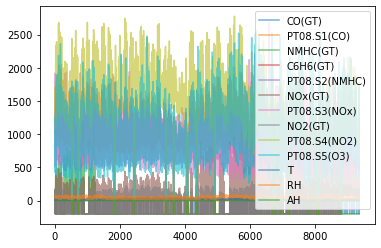

In [19]:
# 시간을 제외한 feature들 대강 추세선 한번에 보기
org_df.loc[:, 'CO(GT)':].plot(alpha=0.6)

<AxesSubplot:>

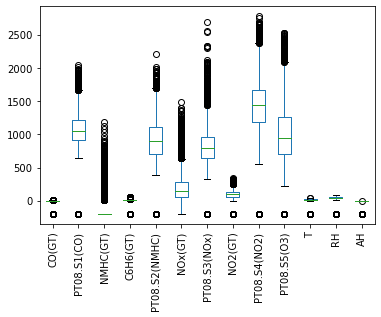

In [23]:
# 대략적인 분포 보기
org_df.plot(kind='box', rot=90)

In [51]:
# -200으로 표기된 (아마) 결측치들을 NaN으로 표시하기
df = org_df[org_df != -200]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

데이터의 90% 가까이 손실된 NMHC는 그냥 column 삭제를 해주는 게 낫겠다.

In [61]:
df.drop('NMHC(GT)', axis=1, inplace=True)

## 2장 : 시계열 데이터 가공법

In [41]:
import datetime as dt

In [55]:
from dateutil.parser import parse
hour = df['Time']
d = parse('4:00:00')

In [58]:
a = dt.datetime.fromtimestamp(df.loc[3, 'Date'])
print(a)

TypeError: an integer is required (got type Timestamp)

In [50]:
df.loc[4, 'Date']

Timestamp('2004-03-10 00:00:00')

이거 Time이랑 Date 합치려면 어떡해야 하지?

### 누락된 데이터 처리
- 대치법 : 데이터셋 전체의 관측에 기반해 누락 데이터 처리
- 보간법 : 인접한 데이터를 사용해 누락된 데이터를 추정하는 방법
- 그냥 삭제 : 그냥 삭제


- 포워드 필 : 누락치의 직전 값으로 채우기
- 이동평균 : 결측치 이전의 window 내의 값들을 어떻게 잘 계산해서 채울 값을 계산하는 방법
- 보간법 : 주변 값들의 기하적 관계를 이용해서 채워넣는 값을 계산함

이 중 포워드 필과 이동평균의 경우엔 사전관찰을 배제한다. 따라서 성능이 다른 방법에 비해 떨어질 수 있다. 하지만 논리적으로는 사전관찰을 배제하는 게 맞구..

In [66]:
# 포워드 필
df.ffill() # 넣을 수 있는 대표적인 인자는 axis..

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [67]:
df.ffill().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1023.5+ KB


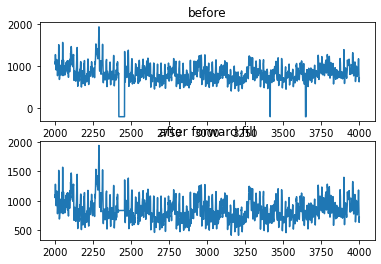

In [72]:
plt.subplot(211)
plt.title('before')
plt.plot(org_df['PT08.S3(NOx)'][2000:4000])
plt.subplot(212)
plt.title('after forward fill')
plt.plot(df.ffill()['PT08.S3(NOx)'][2000:4000])

누락치가 연속되는 경우에는 그냥 일자로 값이 채워지는 걸 볼 수 있음.

백워드 필이라는 방법도 있지만, 사전관찰의 오류를 범하기 쉽다고 함.

In [84]:
# 이동평균으로 결측치 채우기
df.fillna(df.rolling(window = 5).mean()) # 여기서 mean 말고 다른 방법을 취해 지수이동평균 같은 걸로 할 수도 있음

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


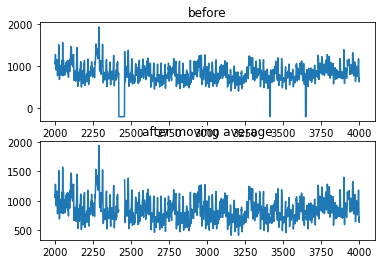

In [93]:
plt.subplot(211)
plt.title('before')
plt.plot(org_df['PT08.S3(NOx)'][2000:4000])
plt.subplot(212)
plt.title('after moving average')
plt.plot(df.fillna(df.rolling(window=100).mean())['PT08.S3(NOx)'][2000:4000])

In [82]:
df.fillna(df.rolling(window= 50).mean()).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1023.5+ KB


결측값의 burst라고 해야 하나? **연속된 결측값 열의 크기가 window보다 큰 경우에는** 못 채워준다는 단점이 있는 듯.
window를 100으로 늘려도 안 되는 건.. 킹쩔 수 없지..

아무튼 burst error가 너무 큰 경우에는 이동평균은 효력이 떨어지는 것 같기도 하다. 상황별로 어떤게 제일 나은지는 추후 조사 필요.

In [86]:
df.interpolate(method = 'linear')

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [87]:
df.interpolate().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1023.5+ KB


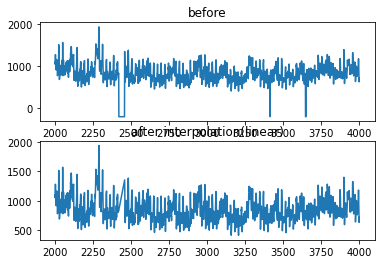

In [88]:
plt.subplot(211)
plt.title('before')
plt.plot(org_df['PT08.S3(NOx)'][2000:4000])
plt.subplot(212)
plt.title('after interpolation(linear)')
plt.plot(df.interpolate()['PT08.S3(NOx)'][2000:4000])

### 결론 : 그냥 맘편하게 드롭하자!

조언해주신 지웅님께 감사를 ...

In [94]:
data = df.dropna()

### 지수평활

각 파라미터에 대해선 https://julialang.kr/?p=2599 참고!

In [104]:
data.ewm(alpha = 0.3).mean()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.600000,1360.000000,11.881723,1045.500000,166.000000,1056.250000,113.000000,1692.000000,1267.500000,13.600000,48.875001,0.757754
1,2.247059,1320.147059,10.420218,992.117647,128.941176,1125.367647,100.647059,1613.617647,1093.823529,13.423529,48.183824,0.738774
2,2.225571,1357.522831,9.770720,967.977169,129.881279,1132.049087,106.744292,1586.623288,1084.771689,12.727854,50.828197,0.744009
3,2.215476,1364.620016,9.556775,960.189104,146.509278,1116.238156,112.767075,1585.488946,1131.545598,12.045717,54.449122,0.760868
4,1.993531,1331.310717,8.461051,915.225307,140.916519,1148.246322,113.932891,1551.054939,1123.776099,11.722715,56.297551,0.770938
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.092217,1253.993068,12.686856,1039.356410,428.481703,592.951671,156.364037,1379.463636,1427.996133,16.173286,43.684876,0.757758
9353,2.884552,1226.545148,12.287346,1035.649487,405.927192,596.191170,163.214826,1344.674545,1380.297293,18.618800,37.696913,0.743990
9354,2.739186,1201.181603,12.313504,1043.704641,372.049035,598.308819,166.660378,1313.497181,1293.808105,21.103160,31.892839,0.712987
9355,2.547431,1141.577122,11.483609,1018.743249,330.784324,629.266173,163.372265,1231.748027,1136.590674,23.269712,26.389987,0.653251


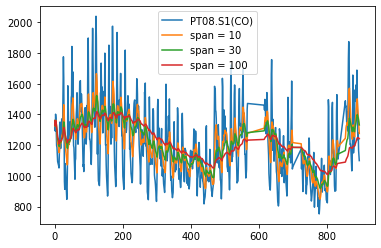

In [111]:
# span에 따른 지수평활
data.loc[:1000, 'PT08.S1(CO)'].plot()
data.ewm(span = 10).mean().loc[:1000, 'PT08.S1(CO)'].plot(label = 'span = 10')
data.ewm(span = 30).mean().loc[:1000, 'PT08.S1(CO)'].plot(label = 'span = 30')
data.ewm(span = 100).mean().loc[:1000, 'PT08.S1(CO)'].plot(label = 'span = 100')
plt.legend()

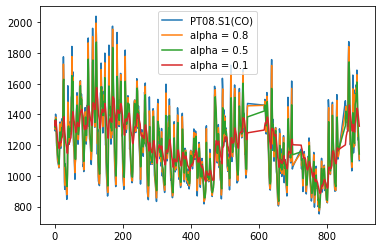

In [113]:
# alpha 에 따른 지수평활
data.loc[:1000, 'PT08.S1(CO)'].plot()
data.ewm(alpha = 0.8).mean().loc[:1000, 'PT08.S1(CO)'].plot(label = 'alpha = 0.8')
data.ewm(alpha = 0.5).mean().loc[:1000, 'PT08.S1(CO)'].plot(label = 'alpha = 0.5')
data.ewm(alpha = 0.1).mean().loc[:1000, 'PT08.S1(CO)'].plot(label = 'alpha = 0.1')
plt.legend()

### 3장 시계열 데이터의 EDA

#### 시각화

- 히스토그램
- 차분 히스토그램

array([[<AxesSubplot:title={'center':'CO(GT)'}>,
        <AxesSubplot:title={'center':'PT08.S1(CO)'}>,
        <AxesSubplot:title={'center':'C6H6(GT)'}>],
       [<AxesSubplot:title={'center':'PT08.S2(NMHC)'}>,
        <AxesSubplot:title={'center':'NOx(GT)'}>,
        <AxesSubplot:title={'center':'PT08.S3(NOx)'}>],
       [<AxesSubplot:title={'center':'NO2(GT)'}>,
        <AxesSubplot:title={'center':'PT08.S4(NO2)'}>,
        <AxesSubplot:title={'center':'PT08.S5(O3)'}>],
       [<AxesSubplot:title={'center':'T'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'AH'}>]], dtype=object)

<Figure size 1440x432 with 0 Axes>

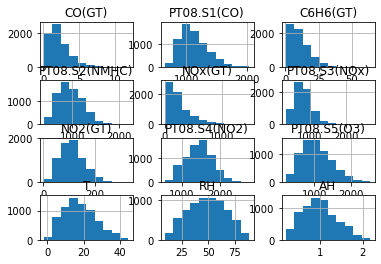

In [125]:
# 일반 히스토그램
plt.figure(figsize=(20, 6))
data.loc[:,'CO(GT)':].hist()

array([[<AxesSubplot:title={'center':'CO(GT)'}>,
        <AxesSubplot:title={'center':'PT08.S1(CO)'}>,
        <AxesSubplot:title={'center':'C6H6(GT)'}>],
       [<AxesSubplot:title={'center':'PT08.S2(NMHC)'}>,
        <AxesSubplot:title={'center':'NOx(GT)'}>,
        <AxesSubplot:title={'center':'PT08.S3(NOx)'}>],
       [<AxesSubplot:title={'center':'NO2(GT)'}>,
        <AxesSubplot:title={'center':'PT08.S4(NO2)'}>,
        <AxesSubplot:title={'center':'PT08.S5(O3)'}>],
       [<AxesSubplot:title={'center':'T'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'AH'}>]], dtype=object)

<Figure size 1440x432 with 0 Axes>

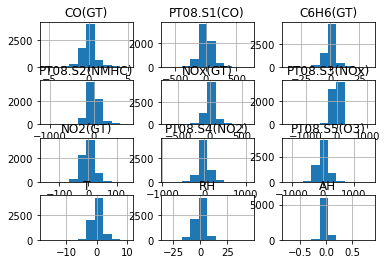

In [134]:
# 차분 히스토그램
plt.figure(figsize=(20, 6))
data.loc[:,'CO(GT)':].diff().hist()

계절성에 따른 을 보여주는 2D, 3D Plot

In [193]:
type(data.loc[3,'Time'])

datetime.time

In [215]:
d = data.copy()

In [208]:
d['Date'].dt.date

0       2004-03-10
1       2004-03-10
2       2004-03-10
3       2004-03-10
4       2004-03-10
           ...    
9352    2005-04-04
9353    2005-04-04
9354    2005-04-04
9355    2005-04-04
9356    2005-04-04
Name: Date, Length: 6941, dtype: object

In [218]:
d['Datetime'] = d['Date'].dt.date + d['Time']

# 미치겠네.. combine을 쓰면 series에는 적용 안 된다고 하고
# series에 적용시키려고 apply에 이걸 이식시키려고 하면 datetime 관련한 연산은 apply에서 안 된다고 하고..

TypeError: unsupported operand type(s) for +: 'datetime.date' and 'datetime.time'

In [206]:
dt.datetime.combine(d['Date'].dt.date, d['Time'])

TypeError: combine() argument 1 must be datetime.date, not Series

- 정상성
- 자기상관
- 편자기상관

In [ ]:
# 정상성


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

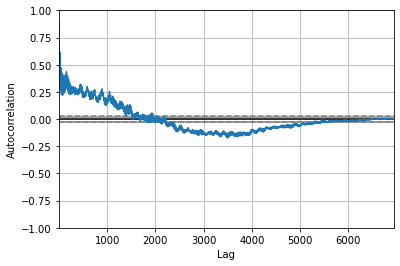

In [139]:
# 자기상관함수 (ACF)
pd.plotting.autocorrelation_plot(data['NOx(GT)'])

교재에 따르면 정상 데이터의 ACF는 0으로빠르게 떨어진다고 하는데..

아직은 이걸 어떻게 봐야할지 잘 모르겠다.

차분에 대해서도 autocorrelation을 돌려 봤는데 얘는 그냥 lag=0,1일 때를 제외하곤 거의 0에 가까운 모습을 보인다.

<AxesSubplot:>

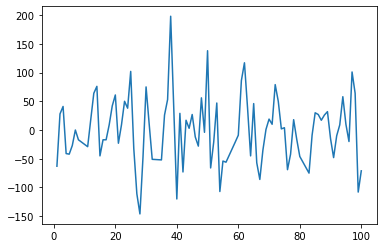

In [158]:
data.loc[:100,'NOx(GT)'].diff().plot()

In [ ]:
pd.plotting.autocorrelation_plot(data['NOx(GT)'])

- 롤링윈도 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
- 확장윈도 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html#pandas.DataFrame.expanding

- 각 윈도에서 가능한 연산들 : https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.min.html 여기서 인덱스 확인하면 된다.

선형 연산(sum,mean 등 원소들의 더하기 곱하기로만 구성할 수 있는 연산)만 가능한 filter 연산과 달리 비선형 연산(최대, 최소, 중간값 등)도 허용하는 것이 특징.

<AxesSubplot:>

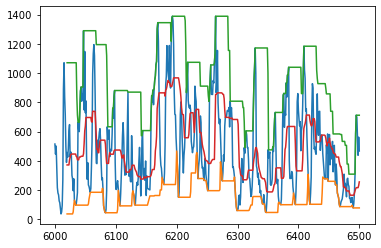

In [167]:
# .rolling()으로 최소값/최대값/중간값 처리 해보기
data.loc[6000:6500, 'NOx(GT)'].plot()
data.loc[6000:6500,'NOx(GT)'].rolling(window=20).min().plot()
data.loc[6000:6500,'NOx(GT)'].rolling(window=20).max().plot()
data.loc[6000:6500,'NOx(GT)'].rolling(window=20).median().plot()

<AxesSubplot:>

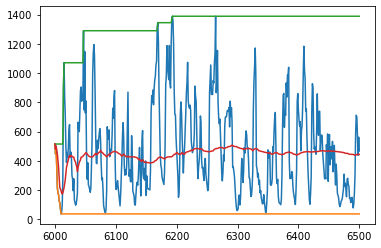

In [171]:
# .expanding()으로 최소값/최대값/중간값 처리 해보기
data.loc[6000:6500, 'NOx(GT)'].plot()
data.loc[6000:6500,'NOx(GT)'].expanding().min().plot()
data.loc[6000:6500,'NOx(GT)'].expanding().max().plot()
data.loc[6000:6500,'NOx(GT)'].expanding().median().plot()

<AxesSubplot:>

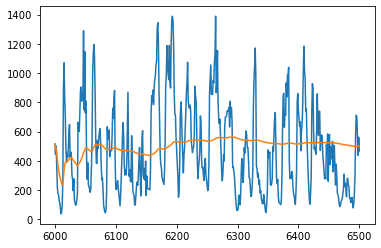

In [170]:
data.loc[6000:6500,'NOx(GT)'].plot()
data.loc[6000:6500,'NOx(GT)'].expanding().mean().plot()

---

미해결 문제
- 시간을 날짜와 통합해서 timestamp로 결합시키는 것
- 자기상관함수, 편자기상관함수 그래프에서 뭔가 통찰을 얻는 법 -> 이건 통계적 모델로 넘어가면 큰그림이 좀 보일 듯